In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import cluster, tree

from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO

from sklearn.decomposition import FactorAnalysis

import pydot
import seaborn as sns

In [189]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [190]:
os.chdir('/Users/Weiyang/Desktop/Morris Hitte Customer Insights')

In [191]:
dataset = pd.read_csv('loyal_customers_dataset_4_clusters.csv', low_memory = False)

In [192]:
dataset.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
0,2518,2,4,1,C,1,B,1,C,B,F,U,0,U,0,U,0,U,0,S,U,S,F,D,1,0,0,1,0,0,0,H,B,B,B,5,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,CT,B,B,1.0,U,U,Y,N,N,0,0,0,0,0,0,3
1,2523,2,5,1,C,1,C,1,C,1,D,B,1,U,0,U,0,U,0,S,U,S,F,G,1,0,0,0,0,0,0,W,B,B,B,2,Y,A,E,N,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,U,U,CT,B,D,15.0,U,Y,M,N,N,0,0,1,0,0,0,3
2,3532,2,4,1,C,1,A,1,C,B,E,U,0,U,0,U,0,U,0,S,O,S,F,F,1,0,0,0,0,0,0,W,C,C,C,2,Y,H,H,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,2,NJ,B,H,15.0,99,Y,Y,N,N,0,0,0,0,0,0,0
3,5046,2,5,1,C,1,C,1,C,E,G,U,0,U,0,U,0,U,0,S,O,S,F,D,2,3,0,1,0,0,1,H,C,C,B,5,Y,G,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NJ,H,C,15.0,U,M,M,Y,N,20,1104,0,0,0,0,1
4,4814,2,5,1,C,1,A,1,C,A,G,U,0,U,0,U,0,U,0,S,O,S,F,G,1,2,1,0,1,0,0,W,A,B,A,0,Y,E,F,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,1,NJ,B,F,3.0,5,M,U,N,N,0,0,0,0,0,0,3


In [193]:
dataset['wc_big_ticket_num_items'].value_counts()

C    1180
0    1110
A     846
B     792
Name: wc_big_ticket_num_items, dtype: int64

In [194]:
data_list = []
for row in dataset['Retail_Card']:
    if row == 'N' or row == 'U':
        data_list.append(0)
    else:
        data_list.append(1)
        
data_list = pd.DataFrame(data_list, columns = ['Has_Retail_Cards'])

dataset = pd.concat([data_list, dataset], axis = 1)
dataset = dataset.drop(['Retail_Card'], axis = 1)

In [202]:
result0 = dataset[dataset['Cluster'] == 0]

new_list = ['wc_big_ticket_num_items', 
'client_times_shopped_30_days',
'client_shopped_3_mos',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result0 = result0[new_list].reset_index()


data_list = []
for row in result0['wc_big_ticket_num_items']:
    if row == 'C':
        data_list.append(1)
    else:
        data_list.append(0)

data_list = pd.DataFrame(data_list, columns=['Bought_C'])

result0 = pd.concat([data_list, result0], axis = 1)
result0 = result0.drop(['wc_big_ticket_num_items' , 'index'], axis = 1)

result0 = pd.get_dummies(result0)

result0.to_csv('loyal_cluster0_log_reg.csv', index = False)

In [203]:
result1 = dataset[dataset['Cluster'] == 1]

new_list = ['wc_big_ticket_num_items', 
'client_times_shopped_30_days',
'client_shopped_3_mos',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result1 = result1[new_list].reset_index()


data_list = []
for row in result1['wc_big_ticket_num_items']:
    if row == 'C':
        data_list.append(1)
    else:
        data_list.append(0)

data_list = pd.DataFrame(data_list, columns=['Bought_C'])

result1 = pd.concat([data_list, result1], axis = 1)
result1 = result1.drop(['wc_big_ticket_num_items' , 'index'], axis = 1)

result1 = pd.get_dummies(result1)

result1.to_csv('loyal_cluster1_log_reg.csv', index = False)

In [205]:
result2 = dataset[dataset['Cluster'] == 2]

new_list = ['wc_big_ticket_num_items', 
'client_times_shopped_30_days',
'client_shopped_3_mos',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result2 = result2[new_list].reset_index()

data_list = []
for row in result2['wc_big_ticket_num_items']:
    if row == 'C':
        data_list.append(1)
    else:
        data_list.append(0)

data_list = pd.DataFrame(data_list, columns=['Bought_C'])

result2 = pd.concat([data_list, result2], axis = 1)
result2 = result2.drop(['wc_big_ticket_num_items' , 'index'], axis = 1)

result2 = pd.get_dummies(result2)

result2.to_csv('loyal_cluster2_log_reg.csv', index = False)

In [206]:
result3 = dataset[dataset['Cluster'] == 3]

new_list = ['wc_big_ticket_num_items', 
'client_times_shopped_30_days',
'client_shopped_3_mos',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result3 = result3[new_list].reset_index()

data_list = []
for row in result3['wc_big_ticket_num_items']:
    if row == 'C':
        data_list.append(1)
    else:
        data_list.append(0)

data_list = pd.DataFrame(data_list, columns=['Bought_C'])

result3 = pd.concat([data_list, result3], axis = 1)
result3 = result3.drop(['wc_big_ticket_num_items' , 'index'], axis = 1)

result3 = pd.get_dummies(result3)

result3.to_csv('loyal_cluster3_log_reg.csv', index = False)

In [91]:
dataset['Loyalty'].value_counts()

2    3928
Name: Loyalty, dtype: int64

In [92]:
dataset['wc_num_items'].value_counts()

C    3880
0      24
B      17
A       7
Name: wc_num_items, dtype: int64

In [99]:
dataset.groupby('Cluster')['wc_big_ticket_num_items'].agg({'count'})

,count
Cluster,
0,1348
1,1033
2,736
3,811


In [94]:
result1 = dataset[dataset['wc_num_items'] == 'C']

In [95]:
result1['wc_big_ticket_num_items'].value_counts()

C    1180
0    1070
A     839
B     791
Name: wc_big_ticket_num_items, dtype: int64

In [7]:
dataset['RFM_score'].value_counts()

4     2520
5     1152
7      102
6       84
8       57
9       10
10       3
Name: RFM_score, dtype: int64

In [8]:
dataset['wc_bought_any'].value_counts()

1    3904
0      24
Name: wc_bought_any, dtype: int64

In [9]:
results = dataset[dataset['wc_bought_any'] == 0]

In [10]:
results.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
7,6757,2,4,0,0,0,0,0,0,0,0,E,1,U,0,U,0,U,0,M,O,S,F,E,2,2,0,0,0,1,1,U,E,C,C,9,Y,K,H,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NY,C,J,15.0,5,M,Y,N,N,0,0,1,0,0,0,1
83,5200,2,5,0,0,0,0,0,0,0,0,G,1,U,0,U,0,U,0,S,R,M,M,C,1,0,0,0,0,0,0,W,E,E,D,7,Y,A,F,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,2,NY,B,F,1.0,U,U,U,N,N,0,0,1,0,0,0,3
192,30401,2,4,0,0,0,0,0,0,0,0,F,1,U,0,U,0,U,0,S,O,S,F,G,1,0,0,0,0,0,0,B,A,B,B,0,Y,B,A,M,0,0,0,1,0,0,0,1,0,0,0,0,0,M,B,U,IL,B,A,13.0,U,Y,Y,N,N,0,0,1,0,0,0,3
293,9549,2,4,0,0,0,0,0,0,0,0,D,1,U,0,U,0,U,0,S,O,S,F,D,1,1,0,1,0,0,0,W,B,C,B,2,Y,G,E,M,0,0,0,1,0,0,0,0,0,0,0,0,0,M,U,1,PA,H,C,15.0,7,M,M,N,N,0,0,1,0,0,0,0
608,12499,2,5,0,0,0,0,0,0,0,0,G,1,U,0,I,1,U,0,S,U,M,F,E,1,0,0,0,0,0,1,B,B,B,A,1,Y,A,A,M,0,0,1,1,0,1,0,0,0,0,0,0,1,M,B,U,MD,A,A,2.0,U,U,U,N,N,0,0,1,0,1,0,3


### Factor Analysis

In [11]:
X = dataset.drop(['dataright_seq', 'Len_of_Residence', 'Loyalty', 'RFM_score', 'wc_bought_any', 'wc_num_items', 'wc_big_ticket_bought_any', 'wc_big_ticket_num_items', 'wc_low_ticket_bought_any', 'wc_low_ticket_num_items', 'wc_big_ticket_amt_spent', 'wc_low_ticket_amt_spent', 'client_times_shopped_30_days', 'client_shopped_3_mos', 'comp1_times_shopped_30_days', 'comp1_shopped_3_mos', 'comp2_times_shopped_30_days', 'comp2_shopped_3_mos', 'comp3_times_shopped_30_days', 'comp3_shopped_3_mos', 'Child_0_2', 'Child_3_5', 'Child_6_10', 'Child_11_15', 'Child_16_18', 'Mail_Ord_Books', 'Mail_Ord_BooksMags', 'Mail_Ord_Child_Prod', 'Mail_Ord_Clothes', 'Mail_Ord_Cosmetic', 'Mail_Ord_Food', 'Mail_Ord_Gifts', 'Mail_Ord_Furniture', 'Mail_Ord_Mags', 'Mail_Ord_Others', 'Mail_Ord_Jewel', 'Mail_Ord_Big_Clothes', 'Mail_Ord_DVD', 'client_shopped_30_days', 'comp1_shopped_30_days', 'comp2_shopped_30_days', 'comp3_shopped_30_days', 'Cluster'], axis = 1)

In [12]:
X = pd.get_dummies(X)

In [13]:
len(X.columns)

192

In [14]:
Y = dataset['wc_num_items']

In [15]:
factor = FactorAnalysis(n_components = 81, tol=1e-8, max_iter=10000, random_state = 777).fit(X)

In [16]:
results = pd.DataFrame(factor.components_, columns=X.columns)

In [17]:
results

,Num_Adults,Num_Children,ZIP_Income,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,Marital_Status_M,Marital_Status_S,Homeowner_Status_O,Homeowner_Status_R,Homeowner_Status_U,Dwelling_Type_M,Dwelling_Type_S,Gender_F,Gender_M,Age_A,Age_B,Age_C,Age_D,Age_E,Age_F,Age_G,Age_U,Race_A,Race_B,Race_H,Race_U,Race_W,HH_Income_A,HH_Income_B,HH_Income_C,HH_Income_D,HH_Income_E,HH_Income_F,HH_Income_G,HH_Income_H,Eff_Income_B,Eff_Income_C,Eff_Income_D,Eff_Income_E,Eff_Income_F,Eff_Income_G,Socioeconomic_Score_A,Socioeconomic_Score_B,Socioeconomic_Score_C,Socioeconomic_Score_D,Dual_Income_N,Dual_Income_Y,Home_Market_Value_A,Home_Market_Value_B,Home_Market_Value_C,Home_Market_Value_D,Home_Market_Value_E,Home_Market_Value_F,Home_Market_Value_G,Home_Market_Value_H,Home_Market_Value_I,Home_Market_Value_J,Home_Market_Value_K,Home_Market_Value_L,Net_Worth_A,Net_Worth_B,Net_Worth_C,Net_Worth_D,Net_Worth_E,Net_Worth_F,Net_Worth_G,Net_Worth_H,Mail_Order_Buyer_M,Mail_Order_Buyer_N,Mail_Order_Buyer_P,Mail_Order_Buyer_Y,Mail_Order_Response_M,Mail_Order_Response_N,Mail_Order_Response_Y,Occupation_A,Occupation_B,Occupation_D,Occupation_E,Occupation_G,Occupation_H,Occupation_J,Occupation_M,Occupation_O,Occupation_Q,Occupation_U,Education_1,Education_2,Education_3,Education_U,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Est_HH_Debt_Level_A,Est_HH_Debt_Level_B,Est_HH_Debt_Level_C,Est_HH_Debt_Level_D,Est_HH_Debt_Level_E,Est_HH_Debt_Level_F,Est_HH_Debt_Level_G,Est_HH_Debt_Level_H,Est_HH_Debt_Level_I,Est_HH_Invest_Asset_A,Est_HH_Invest_Asset_B,Est_HH_Invest_Asset_C,Est_HH_Invest_Asset_D,Est_HH_Invest_Asset_E,Est_HH_Invest_Asset_F,Est_HH_Invest_Asset_G,Est_HH_Invest_Asset_H,Est_HH_Invest_Asset_I,Est_HH_Invest_Asset_J,Bank_Card_New_Issue_Year_0,Bank_Card_New_Issue_Year_1,Bank_Card_New_Issue_Year_10,Bank_Card_New_Issue_Year_11,Bank_Card_New_Issue_Year_12,Bank_Card_New_Issue_Year_13,Bank_Card_New_Issue_Year_14,Bank_Card_New_Issue_Year_15,Bank_Card_New_Issue_Year_16,Bank_Card_New_Issue_Year_17,Bank_Card_New_Issue_Year_2,Bank_Card_New_Issue_Year_3,Bank_Card_New_Issue_Year_4,Bank_Card_New_Issue_Year_5,Bank_Card_New_Issue_Year_6,Bank_Card_New_Issue_Year_7,Bank_Card_New_Issue_Year_8,Bank_Card_New_Issue_Year_9,Bank_Card_New_Issue_Year_94,Bank_Card_New_Issue_Year_95,Bank_Card_New_Issue_Year_96,Bank_Card_New_Issue_Year_97,Bank_Card_New_Issue_Year_98,Bank_Card_New_Issue_Year_99,Bank_Card_New_Issue_Year_U,Bank_Card_M,Bank_Card_U,Bank_Card_Y,Retail_Card_M,Retail_Card_U,Retail_Card_Y,Buyer_Retail_Last_Order_2yrs_N,Buyer_Retail_Last_Order_2yrs_Y,Buyer_Retail_Last_Order_1yrs_N,Buyer_Retail_Last_Order_1yrs_Y
0,-0.617846,-0.420148,-1.457466,-1.383321,-138.490139,-3.469118e-01,3.469118e-01,-2.250697e-01,1.673387e-01,5.773097e-02,1.120087e-01,-1.120087e-01,-3.278906e-02,3.278906e-02,0.034458,0.079039,0.043474,-0.011930,-0.078700,-0.048650,-0.018880,0.001191,1.371729e-02,5.178120e-02,4.162181e-02,3.794160e-03,-1.109145e-01,2.573709e-02,1.450100e-01,7.915565e-02,-1.595316e-03,-5.521775e-02,-5.721776e-02,-4.825195e-02,-8.762000e-02,0.096061,0.019604,-0.066471,-0.044038,-0.004296,-0.000859,7.095260e-02,3.469737e-02,-8.407931e-03,-9.724204e-02,-3.222588e-01,3.222588e-01,0.117551,0.019450,0.018600,0.009454,-0.009327,-0.014366,-0.035605,-0.027834,-0.053512,-0.013169,-0.009855,-0.001388,1.627106e-01,8.062290e-03,9.058790e-03,1.131538e-02,1.770623e-02,-2.636429e-02,-9.318904e-02,-8.929994e-02,-3.368439e-01,3.105756e-01,2.487154e-03,2.378116e-02,-3.485006e-01,3.089945e-01,3.950604e-02,-0.003592,-0.030127,-0.017024,-0.010770,-0.020991,-0.007589,-0.002248,-0.001170,-0.000718,-0.013871,0.1

### Decision Tree for each Cluster

In [18]:
cluster0 = dataset[dataset['Cluster'] == 0]

In [19]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [20]:
cluster0.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
2,3532,2,4,1,C,1,A,1,C,B,E,U,0,U,0,U,0,U,0,S,O,S,F,F,1,0,0,0,0,0,0,W,C,C,C,2,Y,H,H,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,2,NJ,B,H,15.0,99,Y,Y,N,N,0,0,0,0,0,0,0
15,7621,2,4,1,C,0,0,1,C,0,F,U,0,U,0,U,0,U,0,S,O,S,F,C,2,2,0,0,0,1,1,W,E,D,C,7,Y,G,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,J,U,NY,G,B,15.0,17,M,M,Y,N,2,357,0,0,0,0,0
20,2544,2,4,1,C,1,A,1,C,B,E,U,0,U,0,U,0,U,0,M,O,S,F,E,3,3,0,1,0,0,0,U,F,D,D,6,N,G,G,M,0,1,0,1,0,0,0,1,1,0,0,0,0,M,B,U,CT,I,H,15.0,17,M,M,N,N,2,111,0,0,0,0,0
22,4556,2,5,1,C,0,0,1,C,0,G,U,0,D,1,U,0,E,1,S,O,S,F,D,1,0,0,0,0,0,0,W,E,C,C,5,Y,G,G,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,2,NJ,B,G,1.0,U,U,U,N,N,0,0,0,1,0,1,0
23,3264,2,7,1,C,1,C,1,C,D,E,B,1,C,1,U,0,B,1,S,O,S,F,D,3,2,0,0,0,1,1,W,E,C,C,9,Y,G,F,M,1,1,0,1,0,0,1,0,0,0,0,0,0,M,G,U,NJ,H,C,15.0,17,M,M,N,N,0,0,1,1,0,1,0


In [21]:
cluster0 = cluster0[test_list]

In [22]:
dummies = pd.get_dummies(cluster0.iloc[:,1:])

In [23]:
cluster0 = pd.concat([cluster0['wc_num_items'],dummies],axis = 1)

In [24]:
data_list = list(cluster0.columns)[1:]

In [25]:
tree_train, tree_test = train_test_split(cluster0, test_size=0.33, random_state=777)

In [26]:
cluster0.shape

(1348, 52)

In [27]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [28]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [29]:
test_preds = clf.predict(tree_test[data_list])

In [30]:
clf.predict_proba(tree_test[data_list])

array([[0.00182815, 0.        , 0.99817185],
       [0.        , 0.        , 1.        ],
       [0.00182815, 0.        , 0.99817185],
       ...,
       [0.00182815, 0.        , 0.99817185],
       [0.00182815, 0.        , 0.99817185],
       [0.00182815, 0.        , 0.99817185]])

In [31]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [32]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

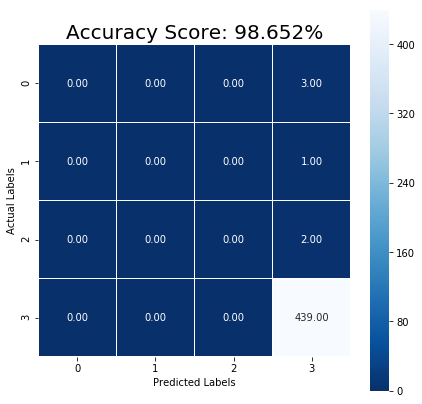

In [33]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [34]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("loyal_customers_cluster0_tree.pdf")

### Decision Tree for Cluster 1

In [35]:
cluster1 = dataset[dataset['Cluster'] == 1]

In [36]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [37]:
cluster1.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
3,5046,2,5,1,C,1,C,1,C,E,G,U,0,U,0,U,0,U,0,S,O,S,F,D,2,3,0,1,0,0,1,H,C,C,B,5,Y,G,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NJ,H,C,15.0,U,M,M,Y,N,20,1104,0,0,0,0,1
7,6757,2,4,0,0,0,0,0,0,0,0,E,1,U,0,U,0,U,0,M,O,S,F,E,2,2,0,0,0,1,1,U,E,C,C,9,Y,K,H,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NY,C,J,15.0,5,M,Y,N,N,0,0,1,0,0,0,1
10,6326,2,7,1,C,1,C,1,C,C,D,D,1,U,0,U,0,U,0,M,O,S,F,F,3,4,1,1,1,1,0,B,D,C,B,6,N,E,D,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,O,U,NY,H,A,15.0,8,M,M,N,N,0,0,1,0,0,0,1
11,6329,2,5,1,C,1,B,1,C,B,G,U,0,U,0,U,0,B,1,M,O,S,F,C,2,2,0,1,0,0,0,W,F,C,B,9,N,E,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NY,I,F,15.0,U,M,U,N,N,0,0,0,0,0,1,1
14,6900,2,5,1,C,1,B,1,C,B,G,U,0,U,0,U,0,B,1,M,O,S,M,D,2,2,0,0,0,1,0,W,D,C,B,6,Y,A,E,M,0,0,0,1,0,0,0,0,0,0,0,0,0,M,U,1,NY,D,F,15.0,U,M,M,N,N,3,522,0,0,0,1,1


In [38]:
cluster1 = cluster1[test_list]

In [39]:
dummies = pd.get_dummies(cluster1.iloc[:,1:])

In [40]:
cluster1 = pd.concat([cluster1['wc_num_items'],dummies],axis = 1)

In [41]:
data_list = list(cluster1.columns)[1:]

In [42]:
tree_train, tree_test = train_test_split(cluster1, test_size=0.33, random_state=777)

In [43]:
cluster1.shape

(1033, 51)

In [44]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [45]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [46]:
test_preds = clf.predict(tree_test[data_list])

In [47]:
clf.predict_proba(tree_test[data_list])

array([[0.02083333, 0.02083333, 0.04166667, 0.91666667],
       [0.00680272, 0.        , 0.01360544, 0.97959184],
       [0.00326797, 0.        , 0.        , 0.99673203],
       ...,
       [0.02702703, 0.        , 0.02702703, 0.94594595],
       [0.00326797, 0.        , 0.        , 0.99673203],
       [0.        , 0.        , 0.        , 1.        ]])

In [48]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [49]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

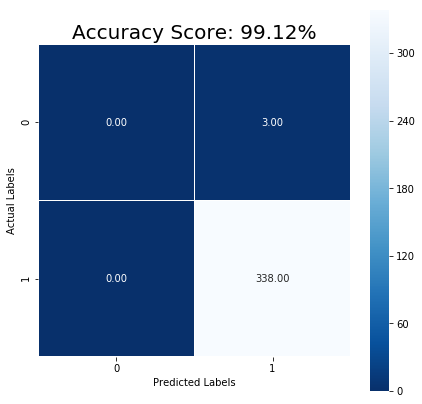

In [50]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [51]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("loyal_customers_cluster1_tree.pdf")

### Decision Tree for Cluster 2

In [52]:
cluster2 = dataset[dataset['Cluster'] == 2]

In [53]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [54]:
cluster2.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
8,5452,2,7,1,C,1,C,1,C,C,D,D,1,U,0,U,0,U,0,M,U,M,F,G,3,0,0,0,0,0,0,B,C,B,C,6,Y,I,E,P,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,2,NY,G,A,NaN,99,Y,M,N,N,0,0,1,0,0,0,2
18,2540,2,5,1,C,1,A,1,C,B,G,U,0,U,0,U,0,B,1,M,O,S,F,C,2,2,0,1,0,1,0,W,G,D,D,9,N,H,G,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,H,H,12.0,U,U,Y,Y,Y,10,1177,0,0,0,1,2
19,2543,2,7,1,C,1,B,1,C,B,E,B,1,U,0,B,1,U,0,M,O,S,F,D,3,0,0,0,0,0,1,W,G,D,D,8,N,H,G,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,H,G,15.0,U,M,M,N,N,0,0,1,0,1,0,2
27,5606,2,4,1,C,0,0,1,C,0,F,U,0,U,0,U,0,U,0,M,R,M,F,D,2,0,0,0,0,0,0,W,H,D,D,8,Y,H,G,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NY,F,G,15.0,4,M,M,N,N,0,0,0,0,0,0,2
35,7630,2,5,1,C,1,B,1,C,D,G,U,0,U,0,U,0,U,0,M,O,S,F,F,3,0,0,0,0,0,0,W,E,D,D,2,N,I,H,M,1,1,0,1,1,0,0,1,1,0,0,1,0,M,H,U,NY,E,I,14.0,17,M,M,N,N,0,0,0,0,0,0,2


In [55]:
cluster2 = cluster2[test_list]

In [56]:
dummies = pd.get_dummies(cluster2.iloc[:,1:])

In [57]:
cluster2 = pd.concat([cluster2['wc_num_items'],dummies],axis = 1)

In [58]:
data_list = list(cluster2.columns)[1:]

In [59]:
tree_train, tree_test = train_test_split(cluster2, test_size=0.33, random_state=777)

In [60]:
cluster2.shape

(736, 50)

In [61]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [62]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [63]:
test_preds = clf.predict(tree_test[data_list])

In [64]:
clf.predict_proba(tree_test[data_list])

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01818182, 0.98181818],
       [0.        , 1.        ],
       [0.01818182, 0.98181818],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01818182, 0.98181818],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01818182, 0.98181818],
       [0.01818182, 0.98181818],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [65]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [66]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

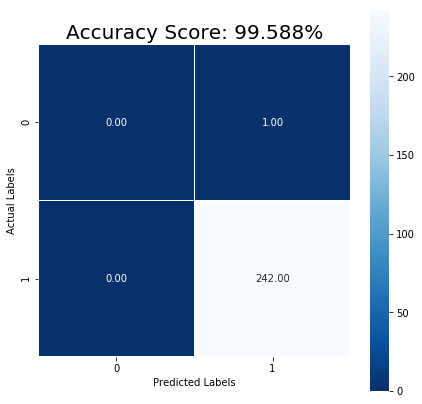

In [67]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [68]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("loyal_customers_cluster2_tree.pdf")

### Decision Tree for Cluster 3

In [69]:
cluster3 = dataset[dataset['Cluster'] == 3]

In [70]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [71]:
cluster3.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
0,2518,2,4,1,C,1,B,1,C,B,F,U,0,U,0,U,0,U,0,S,U,S,F,D,1,0,0,1,0,0,0,H,B,B,B,5,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,CT,B,B,1.0,U,U,Y,N,N,0,0,0,0,0,0,3
1,2523,2,5,1,C,1,C,1,C,1,D,B,1,U,0,U,0,U,0,S,U,S,F,G,1,0,0,0,0,0,0,W,B,B,B,2,Y,A,E,N,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,U,U,CT,B,D,15.0,U,Y,M,N,N,0,0,1,0,0,0,3
4,4814,2,5,1,C,1,A,1,C,A,G,U,0,U,0,U,0,U,0,S,O,S,F,G,1,2,1,0,1,0,0,W,A,B,A,0,Y,E,F,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,1,NJ,B,F,3.0,5,M,U,N,N,0,0,0,0,0,0,3
5,5808,2,7,1,C,1,C,1,C,C,E,B,1,U,0,U,0,U,0,S,R,M,F,F,1,0,0,0,0,0,0,H,A,B,A,0,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,1,NY,B,A,NaN,U,U,U,N,N,0,0,1,0,0,0,3
6,6536,2,4,1,C,1,C,1,C,D,C,U,0,U,0,U,0,U,0,S,R,M,F,D,1,2,0,1,0,1,0,B,A,B,A,0,Y,A,A,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,U,1,NY,C,A,NaN,U,U,U,N,N,0,0,0,0,0,0,3


In [72]:
cluster3 = cluster3[test_list]

In [73]:
dummies = pd.get_dummies(cluster3.iloc[:,1:])

In [74]:
cluster3 = pd.concat([cluster3['wc_num_items'],dummies],axis = 1)

In [75]:
data_list = list(cluster3.columns)[1:]

In [76]:
tree_train, tree_test = train_test_split(cluster3, test_size=0.33, random_state=777)

In [77]:
cluster3.shape

(811, 52)

In [78]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [79]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [80]:
test_preds = clf.predict(tree_test[data_list])

In [81]:
clf.predict_proba(tree_test[data_list])

array([[0.05454545, 0.03636364, 0.01818182, 0.89090909],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       ...,
       [0.        , 0.        , 0.        , 1.        ],
       [0.05454545, 0.03636364, 0.01818182, 0.89090909],
       [0.        , 0.        , 0.        , 1.        ]])

In [82]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [83]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

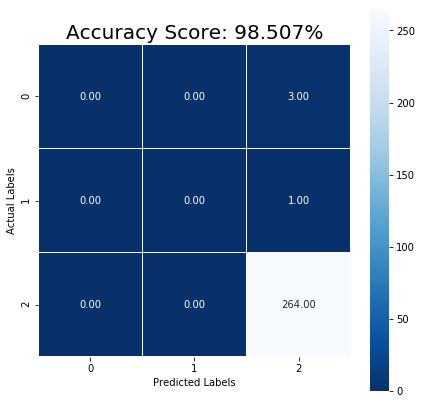

In [84]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [85]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("loyal_customers_cluster3_tree.pdf")